## Tasca 6. Visualització gràfica d'un dataset

[Nivell 1](#nivell-1)
- [Exercici 1](#exercici-1)
    Resumeix gràficament el data set DelayedFlights.csv  
    Crea almenys una visualització per:
    
    - Una variable categòrica (UniqueCarrier)  
    - Una variable numèrica (ArrDelay)  
    - Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)  
    - Dues variables numèriques (ArrDelay i DepDelay)  
    - Tres variables (ArrDelay, DepDelay i UniqueCarrier)  
    - Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)  
    
    
- [Exercici 2](#exercici-2)
    - Exporta els gràfics com imatges o com html


- [Exercici 3](#exercici-3)
    - Exporta el data set net i amb les noves columnes a Excel


- [Exercici 4](#exercici-4)
    - Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3

#### Primer preparem l'entorn per poder treballar amb les dades

### Importem les llibreries


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.express as px


from datetime import datetime
import time
import os

# os.environ['PROJ_LIB'] = '/Users/xavier/opt/anaconda3/envs/udacity_dsnd/share/proj'

from mpl_toolkits.basemap import Basemap

import warnings
warnings.simplefilter('ignore')

### Carreguem les dades

Agafem les dades del fitxer creat i netejat a l'exercici anterior

In [3]:
file = '../Data/CleanDelayedFlights.pickle'

delayed_flights = pd.read_pickle(file, )

In [4]:
carrier_file = '../data/Unique_carriers.csv'
carriers = pd.read_csv(carrier_file, index_col=0).to_dict()['Description']

airports = pd.read_csv('http://stat-computing.org/dataexpo/2009/airports.csv', index_col=0)

In [5]:
delayed_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 7009727
Data columns (total 43 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Year                 int64         
 1   Month                int64         
 2   DayofMonth           int64         
 3   DayOfWeek            int64         
 4   DepTime              object        
 5   CRSDepTime           object        
 6   ArrTime              object        
 7   CRSArrTime           int64         
 8   UniqueCarrier        object        
 9   FlightNum            int64         
 10  TailNum              object        
 11  ActualElapsedTime    float64       
 12  CRSElapsedTime       float64       
 13  AirTime              float64       
 14  ArrDelay             float64       
 15  DepDelay             float64       
 16  Origin               object        
 17  Dest                 object        
 18  Distance             int64         
 19  TaxiIn               

<AxesSubplot:>

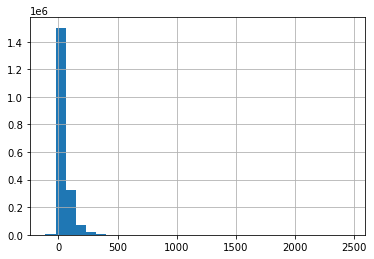

In [6]:
delayed_flights.ArrDelay.hist(bins=30)

### Preprocés

**Ja tenim el DataFrame preprocessat**

##### Detectar Outliers

In [7]:
cols = ['ActualElapsedTime', 'AirTime', 'CRSElapsedTime','DepDelay','ArrDelay', 'CRSElapsedTime_c','ActualElapsedTime_c']
delayed_flights[cols].describe().round(3)

,ActualElapsedTime,AirTime,CRSElapsedTime,DepDelay,ArrDelay,CRSElapsedTime_c,ActualElapsedTime_c
count,1928371.000,1928371.000,1928371.000,1928371.000,1928371.000,1928371.000,1928371.000
mean,133.306,108.277,134.198,43.092,42.200,134.043,133.306
std,72.060,68.642,71.233,53.266,56.785,71.247,72.060
min,14.000,1.000,-21.000,6.000,-109.000,8.000,14.000
25%,80.000,58.000,82.000,12.000,9.000,81.000,80.000
50%,116.000,90.000,116.000,24.000,24.000,116.000,116.000
75%,165.000,137.000,165.000,53.000,56.000,165.000,165.000
max,1114.000,1091.000,660.000,2467.000,2461.000,660.000,1114.000


> Vols amb retràs de sortida que han arribat més d'una hora abans

In [8]:
columnes = ['CRSArrTime','CRSElapsedTime_c', 'ArrDelay','ArrTime','Distance', 'DepTime','ActualElapsedTime_c', 'Origin','Dest', 'Cancelled','Diverted']
delayed_flights[delayed_flights.ArrDelay < -60][columnes]

,CRSArrTime,CRSElapsedTime_c,ArrDelay,ArrTime,Distance,DepTime,ActualElapsedTime_c,Origin,Dest,Cancelled,Diverted
ind,,,,,,,,,,,
164304,1911,115.0,-66.0,1805.0,478,1708.0,57.0,LGA,CMH,0,0
166318,2155,257.0,-66.0,2049.0,1522,1743.0,246.0,JFK,AUS,0,0
271479,2249,389.0,-61.0,2148.0,2381,1933.0,315.0,BOS,LAS,0,0
350426,2359,164.0,-67.0,2252.0,1199,1930.0,82.0,DEN,ATL,0,0
1105848,1310,370.0,-68.0,1202.0,2530,907.0,295.0,SNA,KOA,0,0
1540172,1426,250.0,-69.0,1317.0,1587,1218.0,239.0,ATL,PHX,0,0
1555765,540,320.0,-62.0,438.0,2148,2127.0,251.0,SAN,MCO,0,0
3474707,2215,370.0,-63.0,2112.0,2454,1843.0,329.0,EWR,LAX,0,0
3698229,1520,170.0,-109.0,1331.0,1164,1449.0,42.0,AUS,SAN,0,0


In [9]:
columnes = ['CRSArrTime','CRSElapsedTime', 'ArrDelay','ArrTime','Distance', 'DepTime','ActualElapsedTime', 'Origin','Dest', 'Cancelled','Diverted']
print(f'% vols sense retràs arribada: {delayed_flights[delayed_flights.ArrDelay <= 0].ArrDelay.count()/delayed_flights.ArrDelay.count() * 100:.2f}%')

% vols sense retràs arribada: 10.63%


## Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

#### Una variable categòrica (UniqueCarrier)  

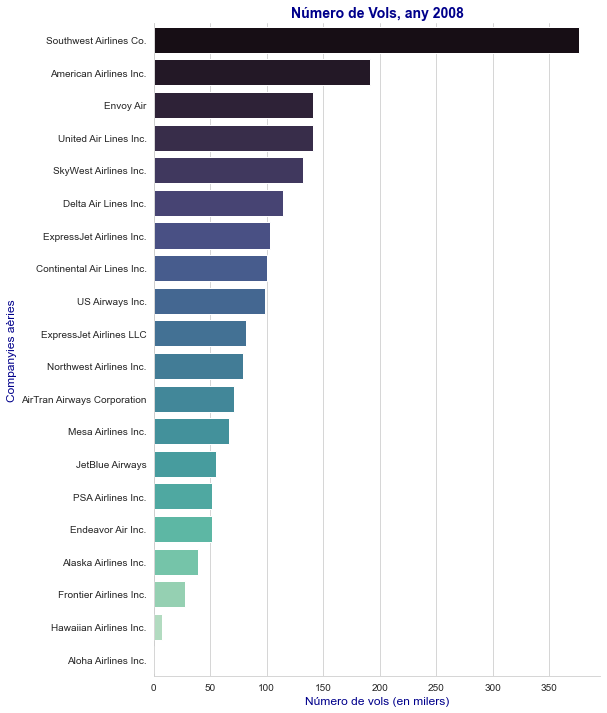

In [10]:
data = delayed_flights.UniqueCarrier.value_counts()

plt.figure(figsize=(8,12))
sns.set_style('whitegrid')
ax = sns.barplot(data=data, y=data.index.map(carriers), x=np.round(data.values/1000,0),
           palette='mako', orient='h')

ax.set_title(f'Número de Vols, any {delayed_flights.Year.unique()[0]}', 
             fontdict={'fontsize':14, 'fontweight':'bold','color':'darkblue' })

ax.set_xlabel('Número de vols (en milers)', fontdict={'fontsize':12,'color':'darkblue'})
ax.set_ylabel('Companyies aèries', fontdict={'fontsize':12, 'color':'darkblue'})
sns.despine()

# Guardem el gràfic en un png
plt.savefig('../images/t6-1_cat-num_vols.png', )

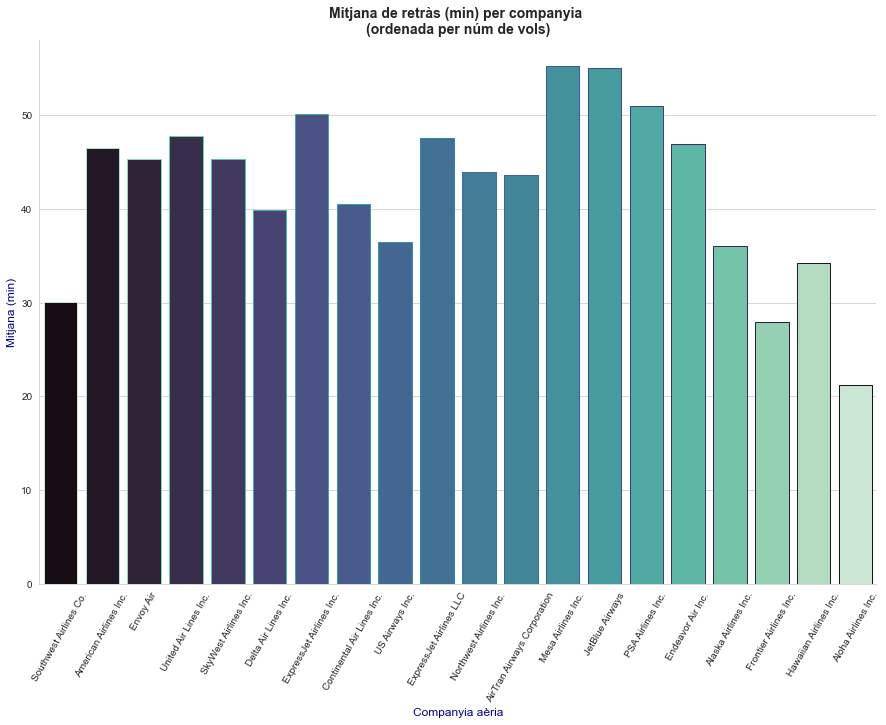

In [11]:
group = delayed_flights.groupby('UniqueCarrier').agg({'ArrDelay':['count','sum','mean'],'DepDelay':['sum','mean']})
# renombrem les columnes
group.columns = ['_'.join(col).strip('_') for col in group.columns.values]
# group.droplevel(0, axis=1)
group.reset_index(inplace=True)

plt.figure(figsize=(15,10))
data = group.reset_index().sort_values([('ArrDelay_count')], ascending=False)
ax = sns.barplot(data=data,
            x=data['UniqueCarrier'].map(carriers), y='ArrDelay_mean',
            palette='mako',
#             facecolor='none',
            edgecolor=sns.color_palette("mako_r", len(data.UniqueCarrier.unique())),
            )

#https://stackoverflow.com/questions/56075639/labels-are-printed-when-set-xticklabels-called
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=60, )
_ = ax.set_title("Mitjana de retràs (min) per companyia \n(ordenada per núm de vols)", 
                 fontdict={'fontsize':14, 'fontweight':'bold'})

ax.set_xlabel('Companyia aèria', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Mitjana (min)', fontdict={'fontsize':12, 'color':'darkblue'})
sns.despine()

plt.savefig('../images/t6-1_mitjana_retras_companyia.png')


#### Una variable numèrica (ArrDelay)  

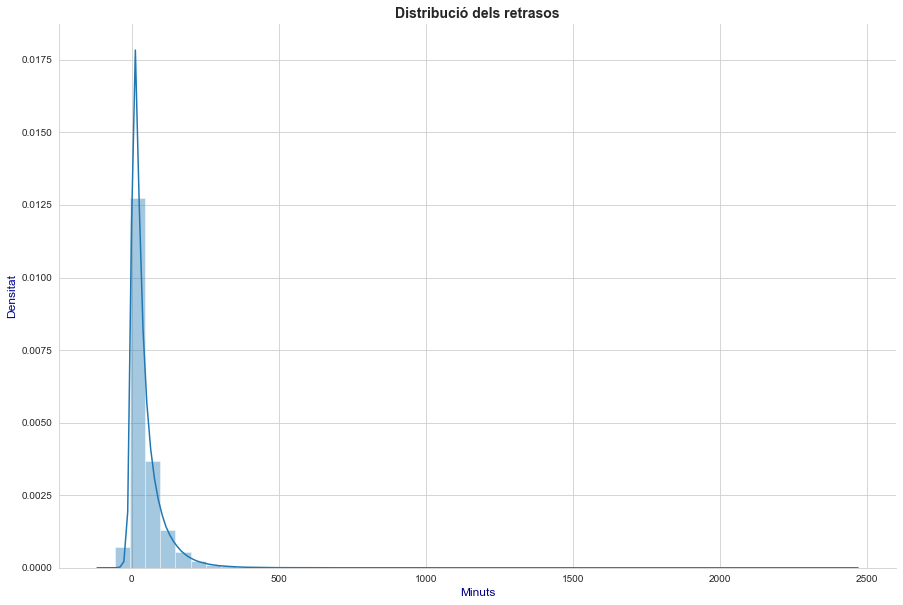

In [12]:
plt.figure(figsize=(15,10))

# sns.histplot(x=delayed_flights.ArrDelay)
ax = sns.distplot(x=delayed_flights.ArrDelay)

ax.set_title('Distribució dels retrasos', fontdict={'fontsize':14, 'fontweight':'bold'})

ax.set_xlabel('Minuts', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Densitat', fontdict={'fontsize':12, 'color':'darkblue'})

# ax.legend(labels=['ArrDelay'], loc='lower right', borderaxespad=3, fontsize='large', labelcolor='darkblue', )
sns.despine()

plt.savefig('../images/t6-1_var_arrdelay_dens.png')

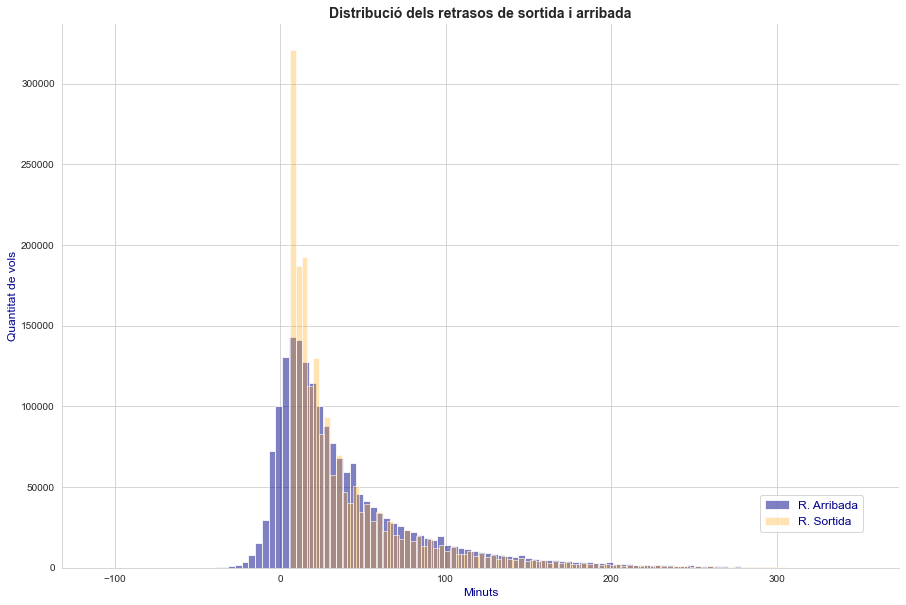

In [13]:
plt.figure(figsize=(15,10))

ax = sns.histplot(x=delayed_flights[delayed_flights.ArrDelay<300].ArrDelay, color='darkblue', alpha=0.5, bins=100)
ax = sns.histplot(x=delayed_flights[delayed_flights.ArrDelay<300].DepDelay, color='orange', alpha=0.3, bins=100 )

ax.set_title('Distribució dels retrasos de sortida i arribada', fontdict={'fontsize':14, 'fontweight':'bold'})

ax.set_xlabel('Minuts', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Quantitat de vols', fontdict={'fontsize':12, 'color':'darkblue'})
ax.legend(labels=['R. Arribada', 'R. Sortida'], loc='lower right', borderaxespad=3, fontsize='large', labelcolor='darkblue', )
sns.despine()

plt.savefig('../images/t6-1_var_distr_retras.png')

In [14]:
(delayed_flights.ArrDelay).describe().apply("{0:.2f}".format)

count    1928371.00
mean          42.20
std           56.78
min         -109.00
25%            9.00
50%           24.00
75%           56.00
max         2461.00
Name: ArrDelay, dtype: object

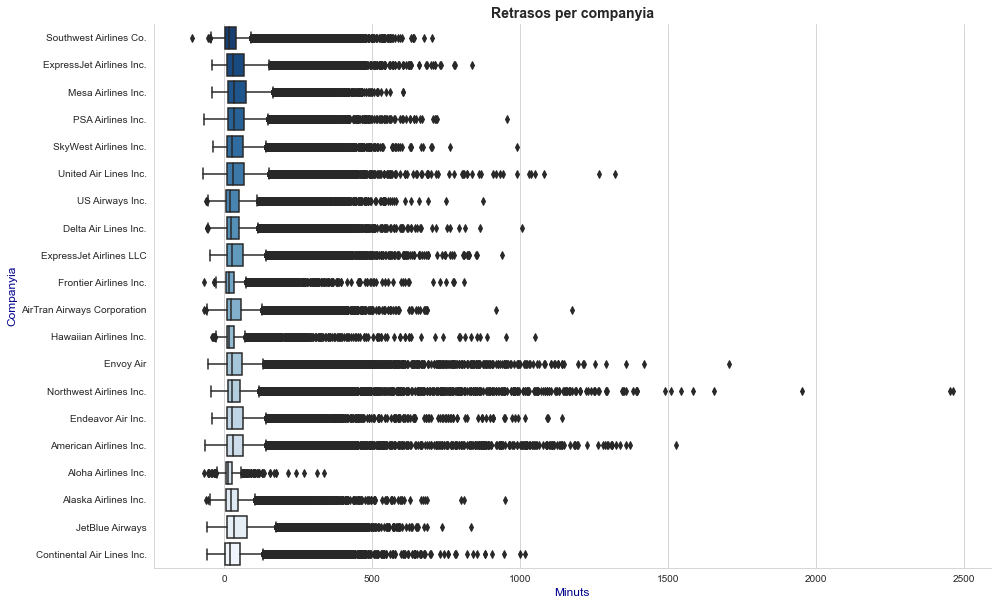

In [15]:
plt.figure(figsize=(15,10))
# data = delayed_flights[delayed_flights.ArrDelay < IQR(delayed_flights,['ArrDelay'])[1][0]]
data = delayed_flights
ax = sns.boxplot(data=data, y=data.UniqueCarrier.map(carriers), x='ArrDelay',
           orient='h', palette='Blues_r')

ax.set_title('Retrasos per companyia', fontdict={'fontsize':14, 'fontweight':'bold'})

ax.set_xlabel('Minuts', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Companyia', fontdict={'fontsize':12, 'color':'darkblue'})

sns.despine()
plt.savefig('../images/t6-1_retràs_companyia_boxplot.png')

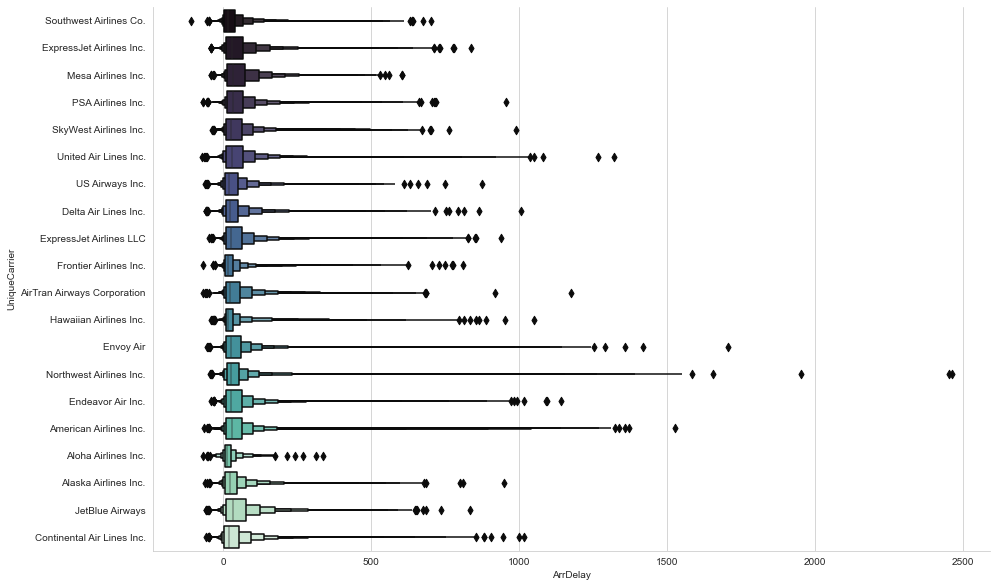

In [16]:
plt.figure(figsize=(15,10))
ax = sns.boxenplot(data=data, y=data.UniqueCarrier.map(carriers), x='ArrDelay', palette='mako', orient='h')
ax.set_title('Retrasos per companyia', fontdict={'fontsize':14, 'fontweight':'bold'})

ax.set_xlabel('Minuts', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Companyia', fontdict={'fontsize':12, 'color':'darkblue'})

sns.despine()
plt.savefig('../images/t6-1_retràs_companyia_boxenplot.png')

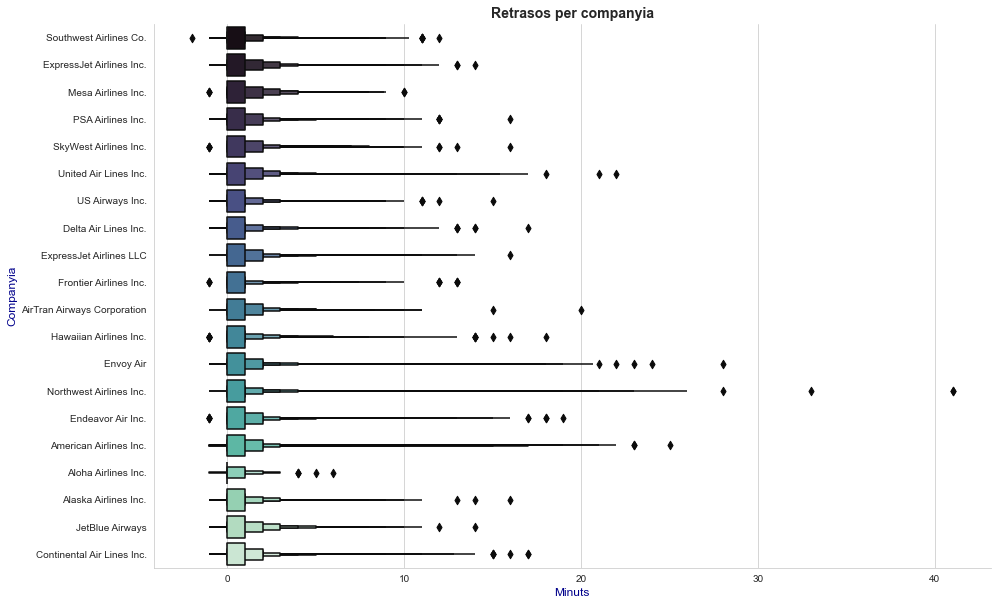

In [17]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')


pal = sns.cubehelix_palette(delayed_flights.carrier_name.nunique(), rot=-.25, light=.7)


mask = (delayed_flights.Cancelled == 0) & (delayed_flights.Diverted== 0)
ax = sns.boxenplot(data=delayed_flights[mask], y=delayed_flights[mask].UniqueCarrier.map(carriers), 
                 x=np.round(delayed_flights[mask].ArrDelay/60,0), orient='h', palette='mako')

# ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

ax.set_title('Retrasos per companyia', fontdict={'fontsize':14, 'fontweight':'bold'})

ax.set_xlabel('Minuts', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Companyia', fontdict={'fontsize':12, 'color':'darkblue'})

sns.despine()
plt.savefig('../images/t6-1_retràs_companyia_boxenplot_hores.png')

#### Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)  

<Figure size 720x1080 with 0 Axes>

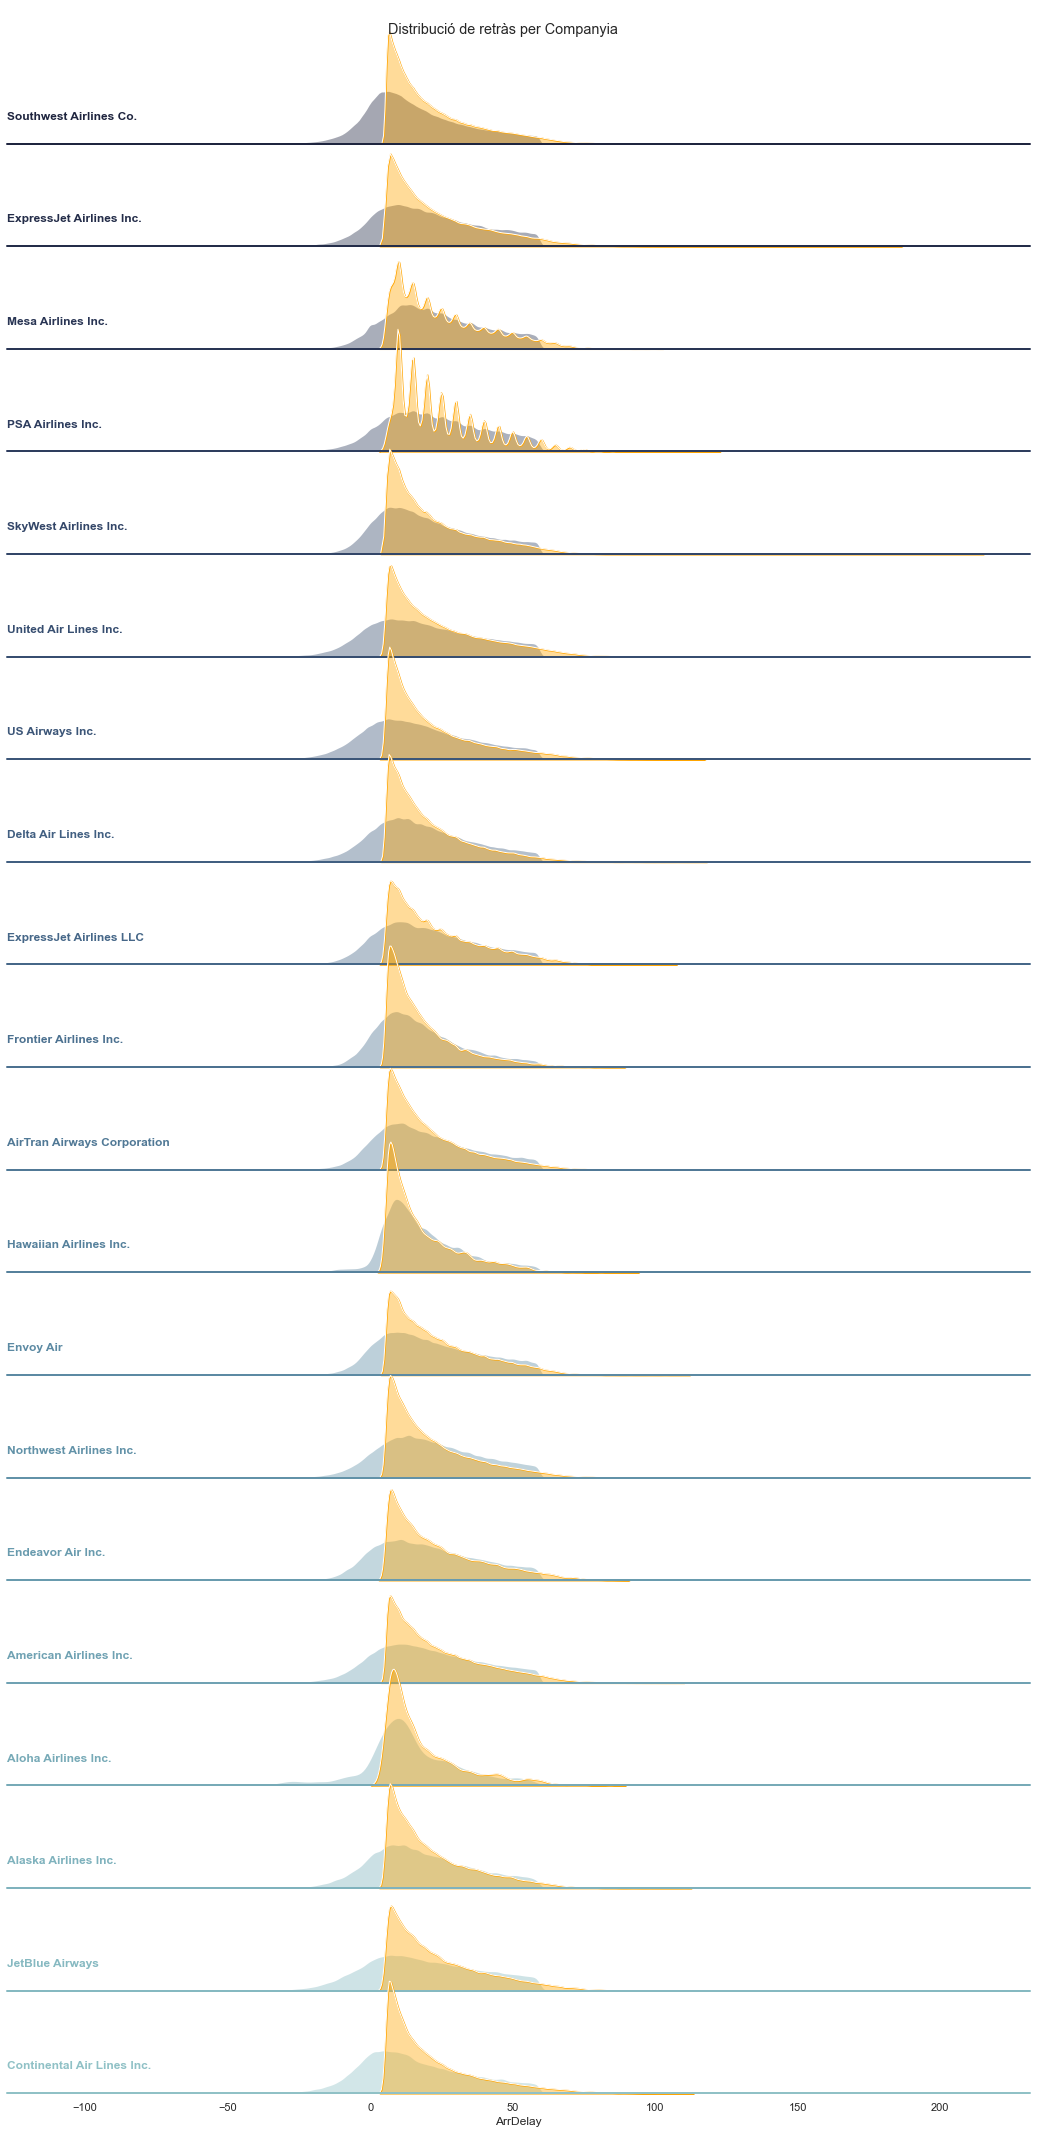

In [18]:
# https://seaborn.pydata.org/examples/kde_ridgeplot

plt.figure(figsize=(10,15))
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(delayed_flights.carrier_name.nunique(), rot=-.25, light=.7, reverse=True)
data = delayed_flights[delayed_flights.ArrDelay < 60]
g = sns.FacetGrid(data, row="UniqueCarrier", hue='carrier_name', aspect=10, height=1.5, palette=pal, )

# Draw the densities in a few steps
g.map(sns.kdeplot, "ArrDelay",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=0.4, linewidth=0.)
# g.map(sns.kdeplot, "ArrDelay", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Draw the densities in a few steps
g.map(sns.kdeplot, "DepDelay",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=0.4, linewidth=1.5, color='orange')
g.map(sns.kdeplot, "DepDelay", clip_on=False, color="w", lw=1, bw_adjust=.5)

g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "ArrDelay")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")

# TITLE
# g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Distribució de retràs per Companyia')

g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.savefig('../images/t6-1_UniqueCarrier_ridgeplot.png')

#### Dues variables numèriques (ArrDelay i DepDelay)  

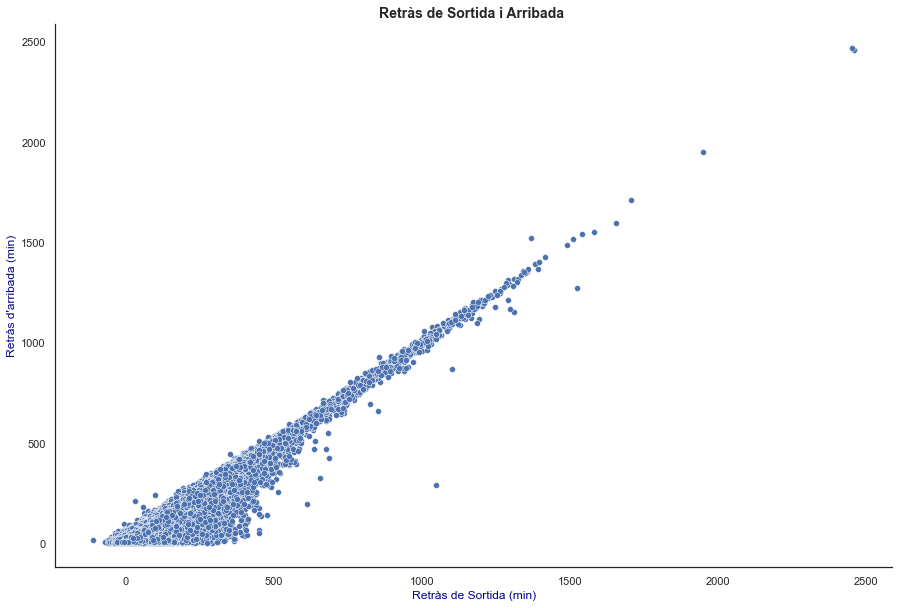

In [19]:
plt.figure(figsize=(15,10))

ax = sns.scatterplot(data=delayed_flights, x='ArrDelay', y='DepDelay', )
# ax.set(xscale="log", yscale="log")

_ = ax.set_title("Retràs de Sortida i Arribada ", 
                 fontdict={'fontsize':14, 'fontweight':'bold'})

ax.set_xlabel('Retràs de Sortida (min)', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel("Retràs d'arribada (min)", fontdict={'fontsize':12, 'color':'darkblue'})
sns.despine()


# Guarda la imatge en png
plt.savefig('../images/t6-1_2_vars_ArrDelay_i_DepDelay.png')

#### Número de vols i retràs acumulat

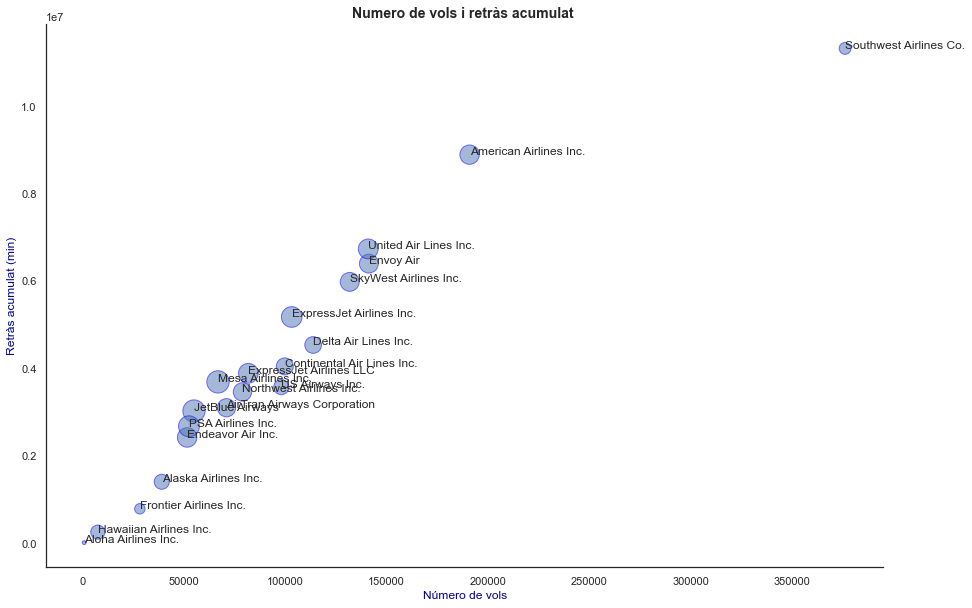

In [20]:
plt.figure(figsize=(15,10))
data = group
data['carrier_name'] = data.UniqueCarrier.map(carriers)
ax = sns.scatterplot(data=data, x='ArrDelay_count', y='ArrDelay_sum', size='ArrDelay_mean',
                alpha=0.5,
                edgecolor='blue',
                palette='mako',
                linewidth=1,
                sizes=(15,500))

for line in range(0,data.shape[0]):
    ax.text(data.iloc[line].ArrDelay_count+2, data.iloc[line].ArrDelay_sum, 
           data.iloc[line].carrier_name)

_ = ax.set_title("Numero de vols i retràs acumulat ", 
                 fontdict={'fontsize':14, 'fontweight':'bold'})

ax.set_ylabel('Retràs acumulat (min)', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_xlabel('Número de vols', fontdict={'fontsize':12, 'color':'darkblue'})
# ax.legend(loc='lower right', borderaxespad=3, fontsize='medium', labelcolor='black', )
ax.legend_.remove()
sns.despine()


# Guarda la imatge en png
plt.savefig('../images/t6-1_num_vols_i_retras_ac.png')

In [21]:
# from collections import OrderedDict
# dies_setmana = OrderedDict({'Monday':'Dilluns', 'Tuesday':'Dimarts', 'Wednesday':'Dimecres', 'Thursday':'Dijous',
#                'Friday':'Divendres', 'Saturday':'Dissabte', 'Sunday':'Diumenge'})

# delayed_flights.DepartureTime.dt.day_name().map(dies_setmana)

In [22]:
# from bokeh.io import output_file, show
# from bokeh.models import ColumnDataSource
# from bokeh.plotting import figure
# from bokeh.sampledata.commits import data
# from bokeh.transform import jitter

# output_file("categorical_scatter_jitter.html")

# DAYS = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']

# source = delayed_flights[['DepartureTime','Origin']]
# source['time'] = source.DepartureTime.dt.time
# source['day_name'] = source.DepartureTime.dt.day_name()
# # print(source.head())
# # print(source.head())
# p = figure(plot_width=800, plot_height=300, y_range=DAYS, x_axis_type='datetime',
#            title="Commits by Time of Day (US/Central) 2012-2016")

# p.circle(x='time', y=jitter('day_name', width=0.6, range=p.y_range),  source=source, alpha=0.3)

# p.xaxis.formatter.days = ['%Hh']
# p.x_range.range_padding = 0
# p.ygrid.grid_line_color = None

# show(p)

In [23]:
delayed_flights.sample(n=1000)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TZ_Dest,dia_add,no_vol,endarrerit,CRSElapsedTime_c,ActualElapsedTime_c,DepartureTime,CRSDepartureTime,ArrivalTime,CRSArrivalTime
ind,,,,,,,,,,,,,,,,,,,,,
6922693,2008,12,16,2,1653.0,1445,2307.0,2045,AA,1358,...,America/Chicago,False,0,True,240.0,254.0,2008-12-16 16:53:00,2008-12-16 14:45:00,2008-12-16 21:07:00,2008-12-16 18:45:00
6580772,2008,12,1,1,1010.0,1004,1428.0,1358,YV,2816,...,America/Chicago,False,0,True,174.0,198.0,2008-12-01 10:10:00,2008-12-01 10:04:00,2008-12-01 13:28:00,2008-12-01 12:58:00
6985419,2008,12,12,5,1709.0,1635,40.0,14,CO,356,...,America/New_York,False,0,True,279.0,271.0,2008-12-12 17:09:00,2008-12-12 16:35:00,2008-12-12 21:40:00,2008-12-12 21:14:00
4506537,2008,8,10,7,1444.0,1415,1852.0,1542,US,767,...,America/New_York,False,0,True,87.0,248.0,2008-08-10 14:44:00,2008-08-10 14:15:00,2008-08-10 18:52:00,2008-08-10 15:42:00
3945363,2008,7,29,2,1218.0,1210,1404.0,1351,EV,4488,...,America/New_York,False,0,True,101.0,106.0,2008-07-29 12:18:00,2008-07-29 12:10:00,2008-07-29 14:04:00,2008-07-29 13:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364086,2008,6,22,7,2338.0,2105,59.0,2232,FL,493,...,America/New_York,False,0,True,87.0,81.0,2008-06-22 23:38:00,2008-06-22 21:05:00,2008-06-23 00:59:00,2008-06-22 22:32:00
6830367,2008,12,9,2,1355.0,1325,1511.0,1435,MQ,3798,...,America/Chicago,False,0,True,70.0,76.0,2008-12-09 13:55:00,2008-12-09 13:25:00,2008-12-09 15:11:00,2008-12-09 14:35:00
722894,2008,2,5,2,1503.0,1340,1707.0,1553,XE,2476,...,America/New_York,False,0,True,133.0,124.0,2008-02-05 15:03:00,2008-02-05 13:40:00,2008-02-05 17:07:00,2008-02-05 15:53:00


#### Tres variables (ArrDelay, DepDelay i UniqueCarrier)  

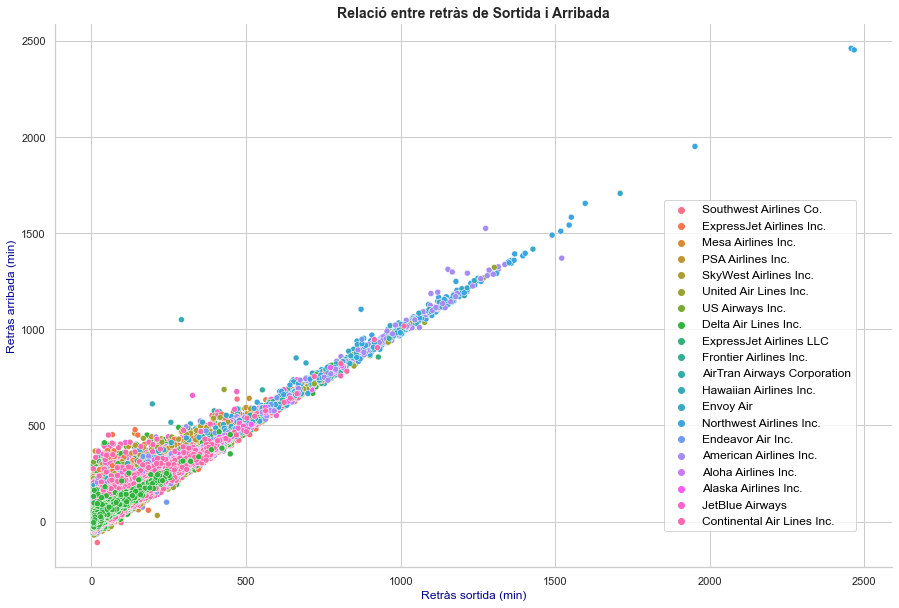

In [24]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(data=delayed_flights, 
                x='DepDelay', y='ArrDelay', 
                hue=delayed_flights.UniqueCarrier.map(carriers))
_ = ax.set_title('Relació entre retràs de Sortida i Arribada', fontdict={'fontsize':14, 'fontweight':'bold'})

# ax.set_xlabel()
sns.despine()



ax.set_xlabel('Retràs sortida (min)', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Retràs arribada (min)', fontdict={'fontsize':12, 'color':'darkblue'})
ax.legend(loc='lower right', borderaxespad=3, fontsize='medium', labelcolor='black',  )
sns.despine()


# Guarda la imatge en png
plt.savefig('../images/t6-1_ArrDelay_DepDelay_UniqueCarrier.png')

#### Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).  

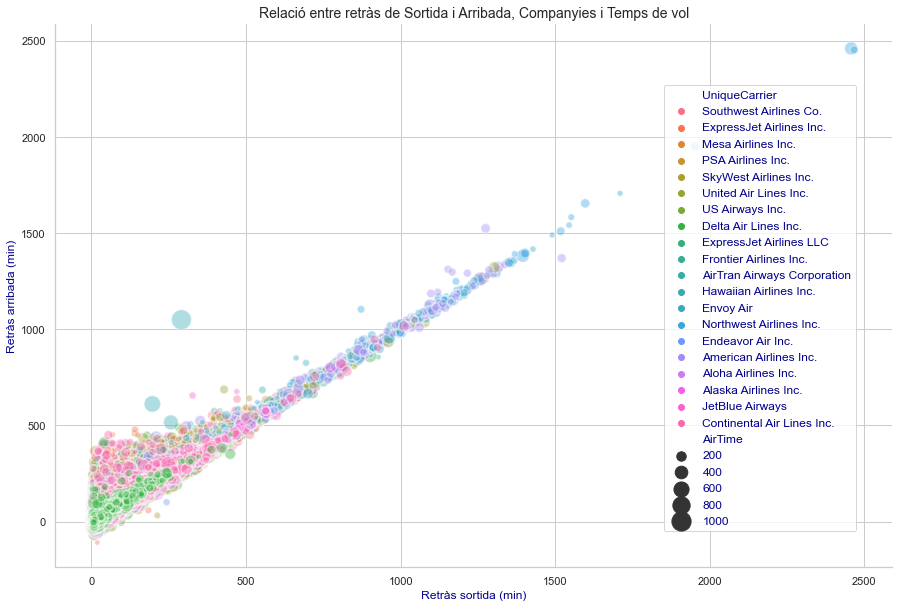

In [25]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=delayed_flights, 
                x='DepDelay', y='ArrDelay', 
                hue=delayed_flights.UniqueCarrier.map(carriers),
                size='AirTime', sizes=(20,400),
                alpha=0.4,
                linewidth=1.5)
_ = ax.set_title('Relació entre retràs de Sortida i Arribada, Companyies i Temps de vol', fontdict={'fontsize':14})
ax.set_xlabel('Retràs sortida (min)', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Retràs arribada (min)', fontdict={'fontsize':12, 'color':'darkblue'})
ax.legend(loc='lower right', borderaxespad=3, fontsize='medium', labelcolor='darkblue',  )
sns.despine()


# Guarda la imatge en png
plt.savefig('../images/t6-1_ArrDelay_DepDelay_UniqueCarrier_AirTime.png')


### Aggregats

In [26]:
group['carrier_name'] = group.UniqueCarrier.map(carriers)


In [27]:
group.head()

,UniqueCarrier,ArrDelay_count,ArrDelay_sum,ArrDelay_mean,DepDelay_sum,DepDelay_mean,carrier_name
0,9E,51569,2420468.0,46.936493,2441828.0,47.350695,Endeavor Air Inc.
1,AA,190910,8889066.0,46.561553,8857373.0,46.395542,American Airlines Inc.
2,AQ,744,15814.0,21.255376,19362.0,26.024194,Aloha Airlines Inc.
3,AS,39010,1406735.0,36.060882,1481435.0,37.975775,Alaska Airlines Inc.
4,B6,54925,3025749.0,55.088739,3017321.0,54.935294,JetBlue Airways


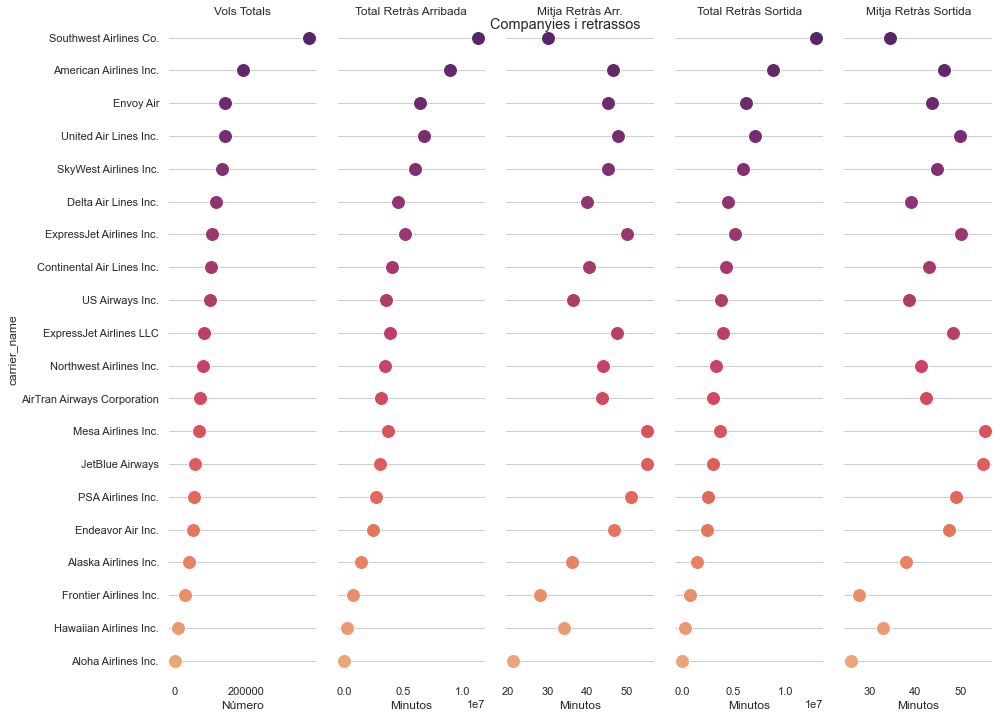

In [28]:
g = sns.PairGrid(group.sort_values('ArrDelay_count',ascending=False),
            x_vars=group.columns[-6:-1], y_vars=['carrier_name'],
            height=10, aspect=.25)

g.map(sns.stripplot, size=14, orient='h', jitter=False, palette='flare_r', linewidth=1, edgecolor='w')

# g.set(xlim=(0,25), xlabel='Minutes', ylabel='')
titles = ['Vols Totals','Total Retràs Arribada','Mitja Retràs Arr.','Total Retràs Sortida','Mitja Retràs Sortida']
etiquetasx = ['Número'] + ['Minutos']*4
for ax, title, etiqx in zip(g.axes.flat, titles, etiquetasx):
    ax.set(title = title)
    ax.set(xlabel=etiqx)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
g.fig.suptitle("Companyies i retrassos")

plt.savefig('../images/t6-1_Companyies_i_Retrassos.png')
sns.despine(left=True, bottom=True)

### Aeroports i retrassos

In [29]:
dforigins = delayed_flights.groupby('Origin').agg({'DepDelay':['sum','count','mean'],'UniqueCarrier':['nunique']})
dforigins.columns = ['_'.join(col).strip('_') for col in dforigins.columns.values]
dforigins.reset_index(inplace=True)

# dforigins[['name','lat','long']] = dforigins.Origin.map(airports[['airport','lat','long']])
dforigins['name'] = dforigins.Origin.map(airports.airport)
dforigins['lat'] = dforigins.Origin.map(airports.lat)
dforigins['long'] = dforigins.Origin.map(airports.long)

# group = delayed_flights.groupby('UniqueCarrier').agg({'ArrDelay':['count','sum','mean'],'DepDelay':['sum','mean']})
# # renombrem les columnes
# group.columns = ['_'.join(col).strip('_') for col in group.columns.values]
# # group.droplevel(0, axis=1)
# group.reset_index(inplace=True)



In [30]:
dforigins.describe().round(2)

,DepDelay_sum,DepDelay_count,DepDelay_mean,UniqueCarrier_nunique,lat,long
count,303.00,303.00,303.00,303.00,303.00,303.00
mean,274246.77,6364.26,48.45,5.86,38.74,-98.85
std,671457.09,15671.93,11.69,5.07,8.51,21.56
min,11.00,1.00,11.00,1.00,17.70,-176.65
25%,12084.50,262.00,40.48,1.00,33.44,-112.55
50%,45026.00,895.00,48.08,4.00,38.70,-93.39
75%,181970.00,3634.50,54.49,9.00,42.94,-82.55
max,6324088.00,131213.00,116.15,17.00,71.29,-64.80


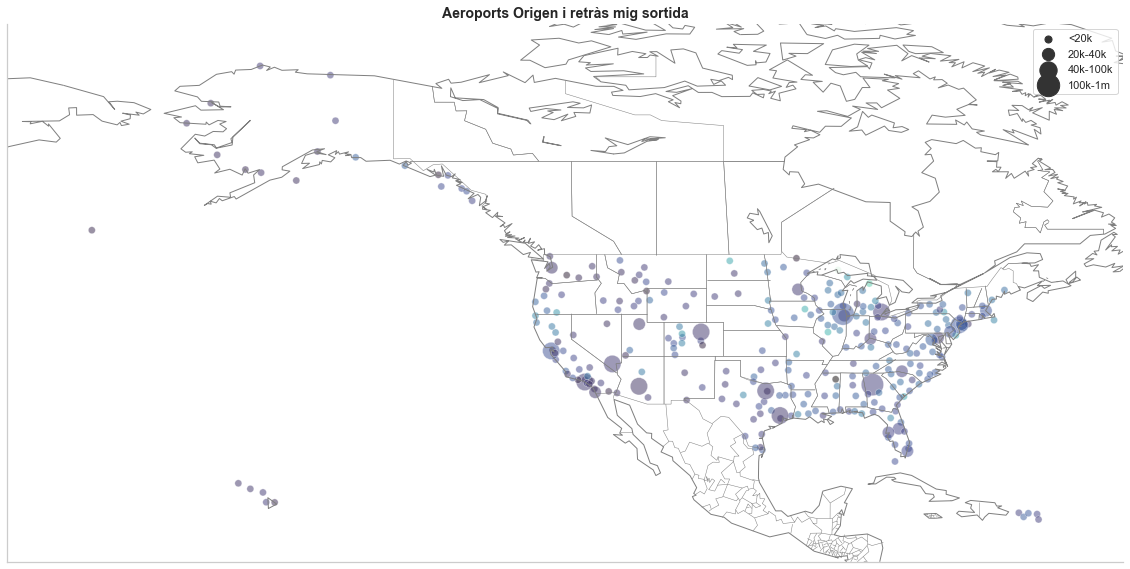

In [31]:
plt.figure(figsize=(20,15))

labels=['<20k','20k-40k','40k-100k','100k-1m']
bins=[0,20000,40000,1e5,1e6]

m = Basemap(llcrnrlon=dforigins.long.min()-10, llcrnrlat=dforigins.lat.min()-5,
            urcrnrlon=dforigins.long.max()+10, urcrnrlat=dforigins.lat.max()+5,)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

g= sns.scatterplot(data=dforigins, x='long', y='lat', alpha=0.5, 
                  size=pd.cut(dforigins.DepDelay_count, bins=bins, labels=labels) , sizes=[50,150,300,500],
                  c=dforigins.DepDelay_mean, cmap='mako')
# g= sns.scatterplot(data=agrupats, x='dest_long', y='dest_lat', alpha=0.5, size=agrupats.FlightNum, sizes=(5,500))

g.legend()
g.set_title('Aeroports Origen i retràs mig sortida', fontdict={'fontsize':14, 'fontweight':'bold'})


# ax.legend(labels=['ArrDelay'], loc='lower right', borderaxespad=3, fontsize='large', labelcolor='darkblue', )
sns.despine()

plt.savefig('../images/t6-1_map_origin_depdelay.png')
# g.get_legend().remove()

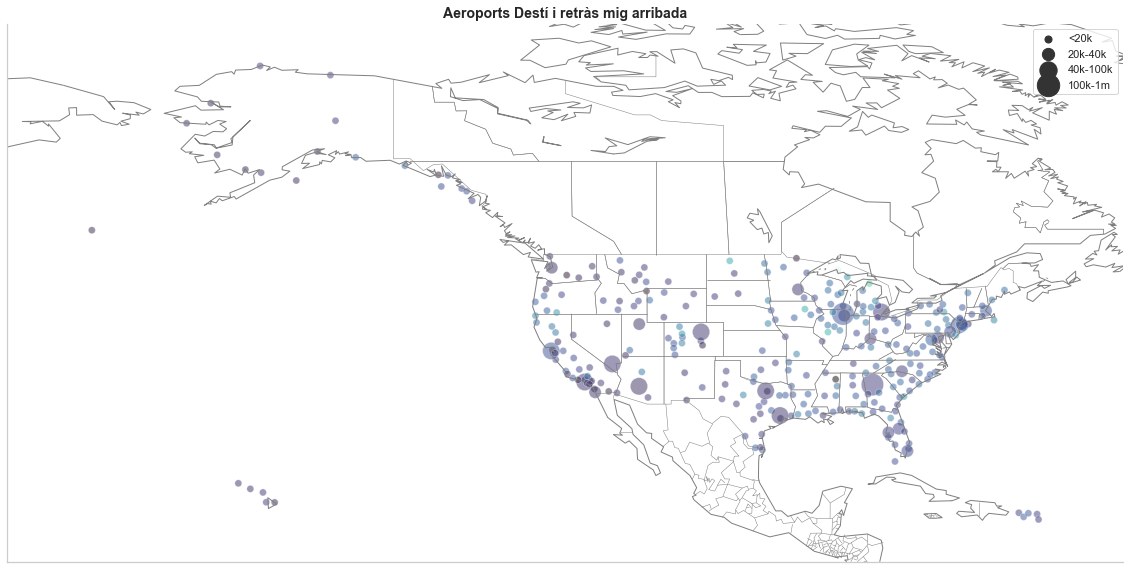

In [32]:
dfdests = delayed_flights.groupby('Dest').agg({'ArrDelay':['sum','count','mean'],'UniqueCarrier':['nunique']})
dfdests.columns = ['_'.join(col).strip('_') for col in dfdests.columns.values]
dfdests.reset_index(inplace=True)

# dforigins[['name','lat','long']] = dforigins.Origin.map(airports[['airport','lat','long']])
dfdests['name'] = dfdests.Dest.map(airports.airport)
dfdests['lat'] = dfdests.Dest.map(airports.lat)
dfdests['long'] = dfdests.Dest.map(airports.long)




plt.figure(figsize=(20,15))

labels=['<20k','20k-40k','40k-100k','100k-1m']
bins=[0,20000,40000,1e5,1e6]

m = Basemap(llcrnrlon=dforigins.long.min()-10, llcrnrlat=dforigins.lat.min()-5,
            urcrnrlon=dforigins.long.max()+10, urcrnrlat=dforigins.lat.max()+5,)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

g= sns.scatterplot(data=dforigins, x='long', y='lat', alpha=0.5, 
                  size=pd.cut(dforigins.DepDelay_count, bins=bins, labels=labels) , sizes=[50,150,300,500],
                  c=dforigins.DepDelay_mean, cmap='mako')
# g= sns.scatterplot(data=agrupats, x='dest_long', y='dest_lat', alpha=0.5, size=agrupats.FlightNum, sizes=(5,500))

g.legend()
g.set_title('Aeroports Destí i retràs mig arribada', fontdict={'fontsize':14, 'fontweight':'bold'})


# ax.legend(labels=['ArrDelay'], loc='lower right', borderaxespad=3, fontsize='large', labelcolor='darkblue', )
sns.despine()

plt.savefig('../images/t6-map_dest_arrdelay.png')
# g.get_legend().remove()

#### Aeroports amb més retrassos acumulats (origen)

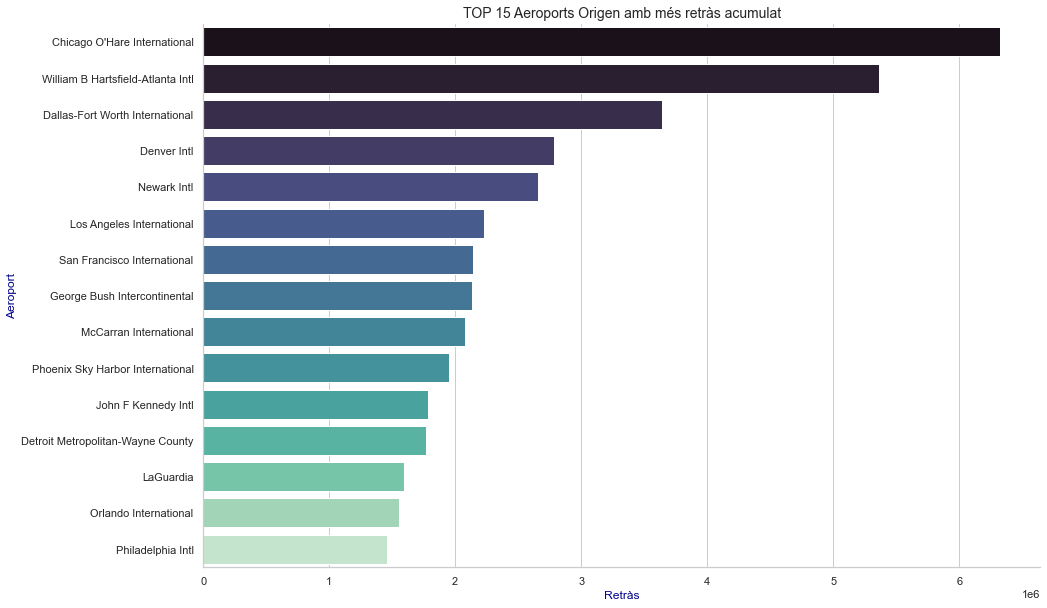

In [33]:
plt.figure(figsize=(15,10))

data = delayed_flights.groupby('Name_Origin').sum()['DepDelay'].reset_index().sort_values(by='DepDelay',ascending=False).head(15)
ax = sns.barplot(y=data.Name_Origin, x=data.DepDelay, orient='h', palette='mako')

_ = ax.set_title('TOP 15 Aeroports Origen amb més retràs acumulat', fontdict={'fontsize':14})
ax.set_xlabel('Retràs', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Aeroport', fontdict={'fontsize':12, 'color':'darkblue'})
sns.despine()


# Guarda la imatge en png
plt.savefig('../images/t6-1_top15_DepDelay_ac.png')

#### Aeroports amb més retrassos acumulats (destí)

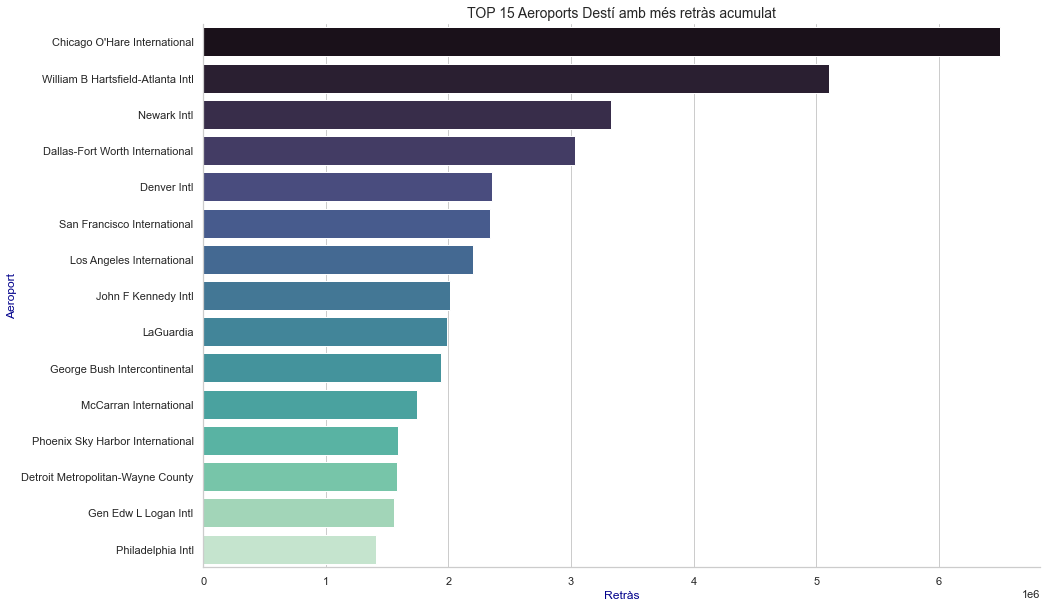

In [34]:
plt.figure(figsize=(15,10))

data = delayed_flights.groupby('Name_Dest').sum()['ArrDelay'].reset_index().sort_values(by='ArrDelay',ascending=False).head(15)
ax = sns.barplot(y=data.Name_Dest, x=data.ArrDelay, orient='h', palette='mako')

_ = ax.set_title('TOP 15 Aeroports Destí amb més retràs acumulat', fontdict={'fontsize':14})
ax.set_xlabel('Retràs', fontdict={'fontsize':12, 'color':'darkblue'})
ax.set_ylabel('Aeroport', fontdict={'fontsize':12, 'color':'darkblue'})
sns.despine()


# Guarda la imatge en png
plt.savefig('../images/t6-1_top15_ArrDelay_ac.png')

#### Connexions i vols

In [35]:
vols_aeroport = delayed_flights.groupby(['Name_Origin','Name_Dest']).UniqueCarrier.count().reset_index()
vols_aeroport.columns = ['Name_Origin','Name_Dest','Vols']
vols_aeroport.head()

,Name_Origin,Name_Dest,Vols
0,Abilene Regional,Dallas-Fort Worth International,392
1,Adak,Ted Stevens Anchorage International,53
2,Adams,Baltimore-Washington International,194
3,Adams,Charlotte/Douglas International,3
4,Adams,Chicago Midway,134


<AxesSubplot:xlabel='Name_Dest', ylabel='Name_Origin'>

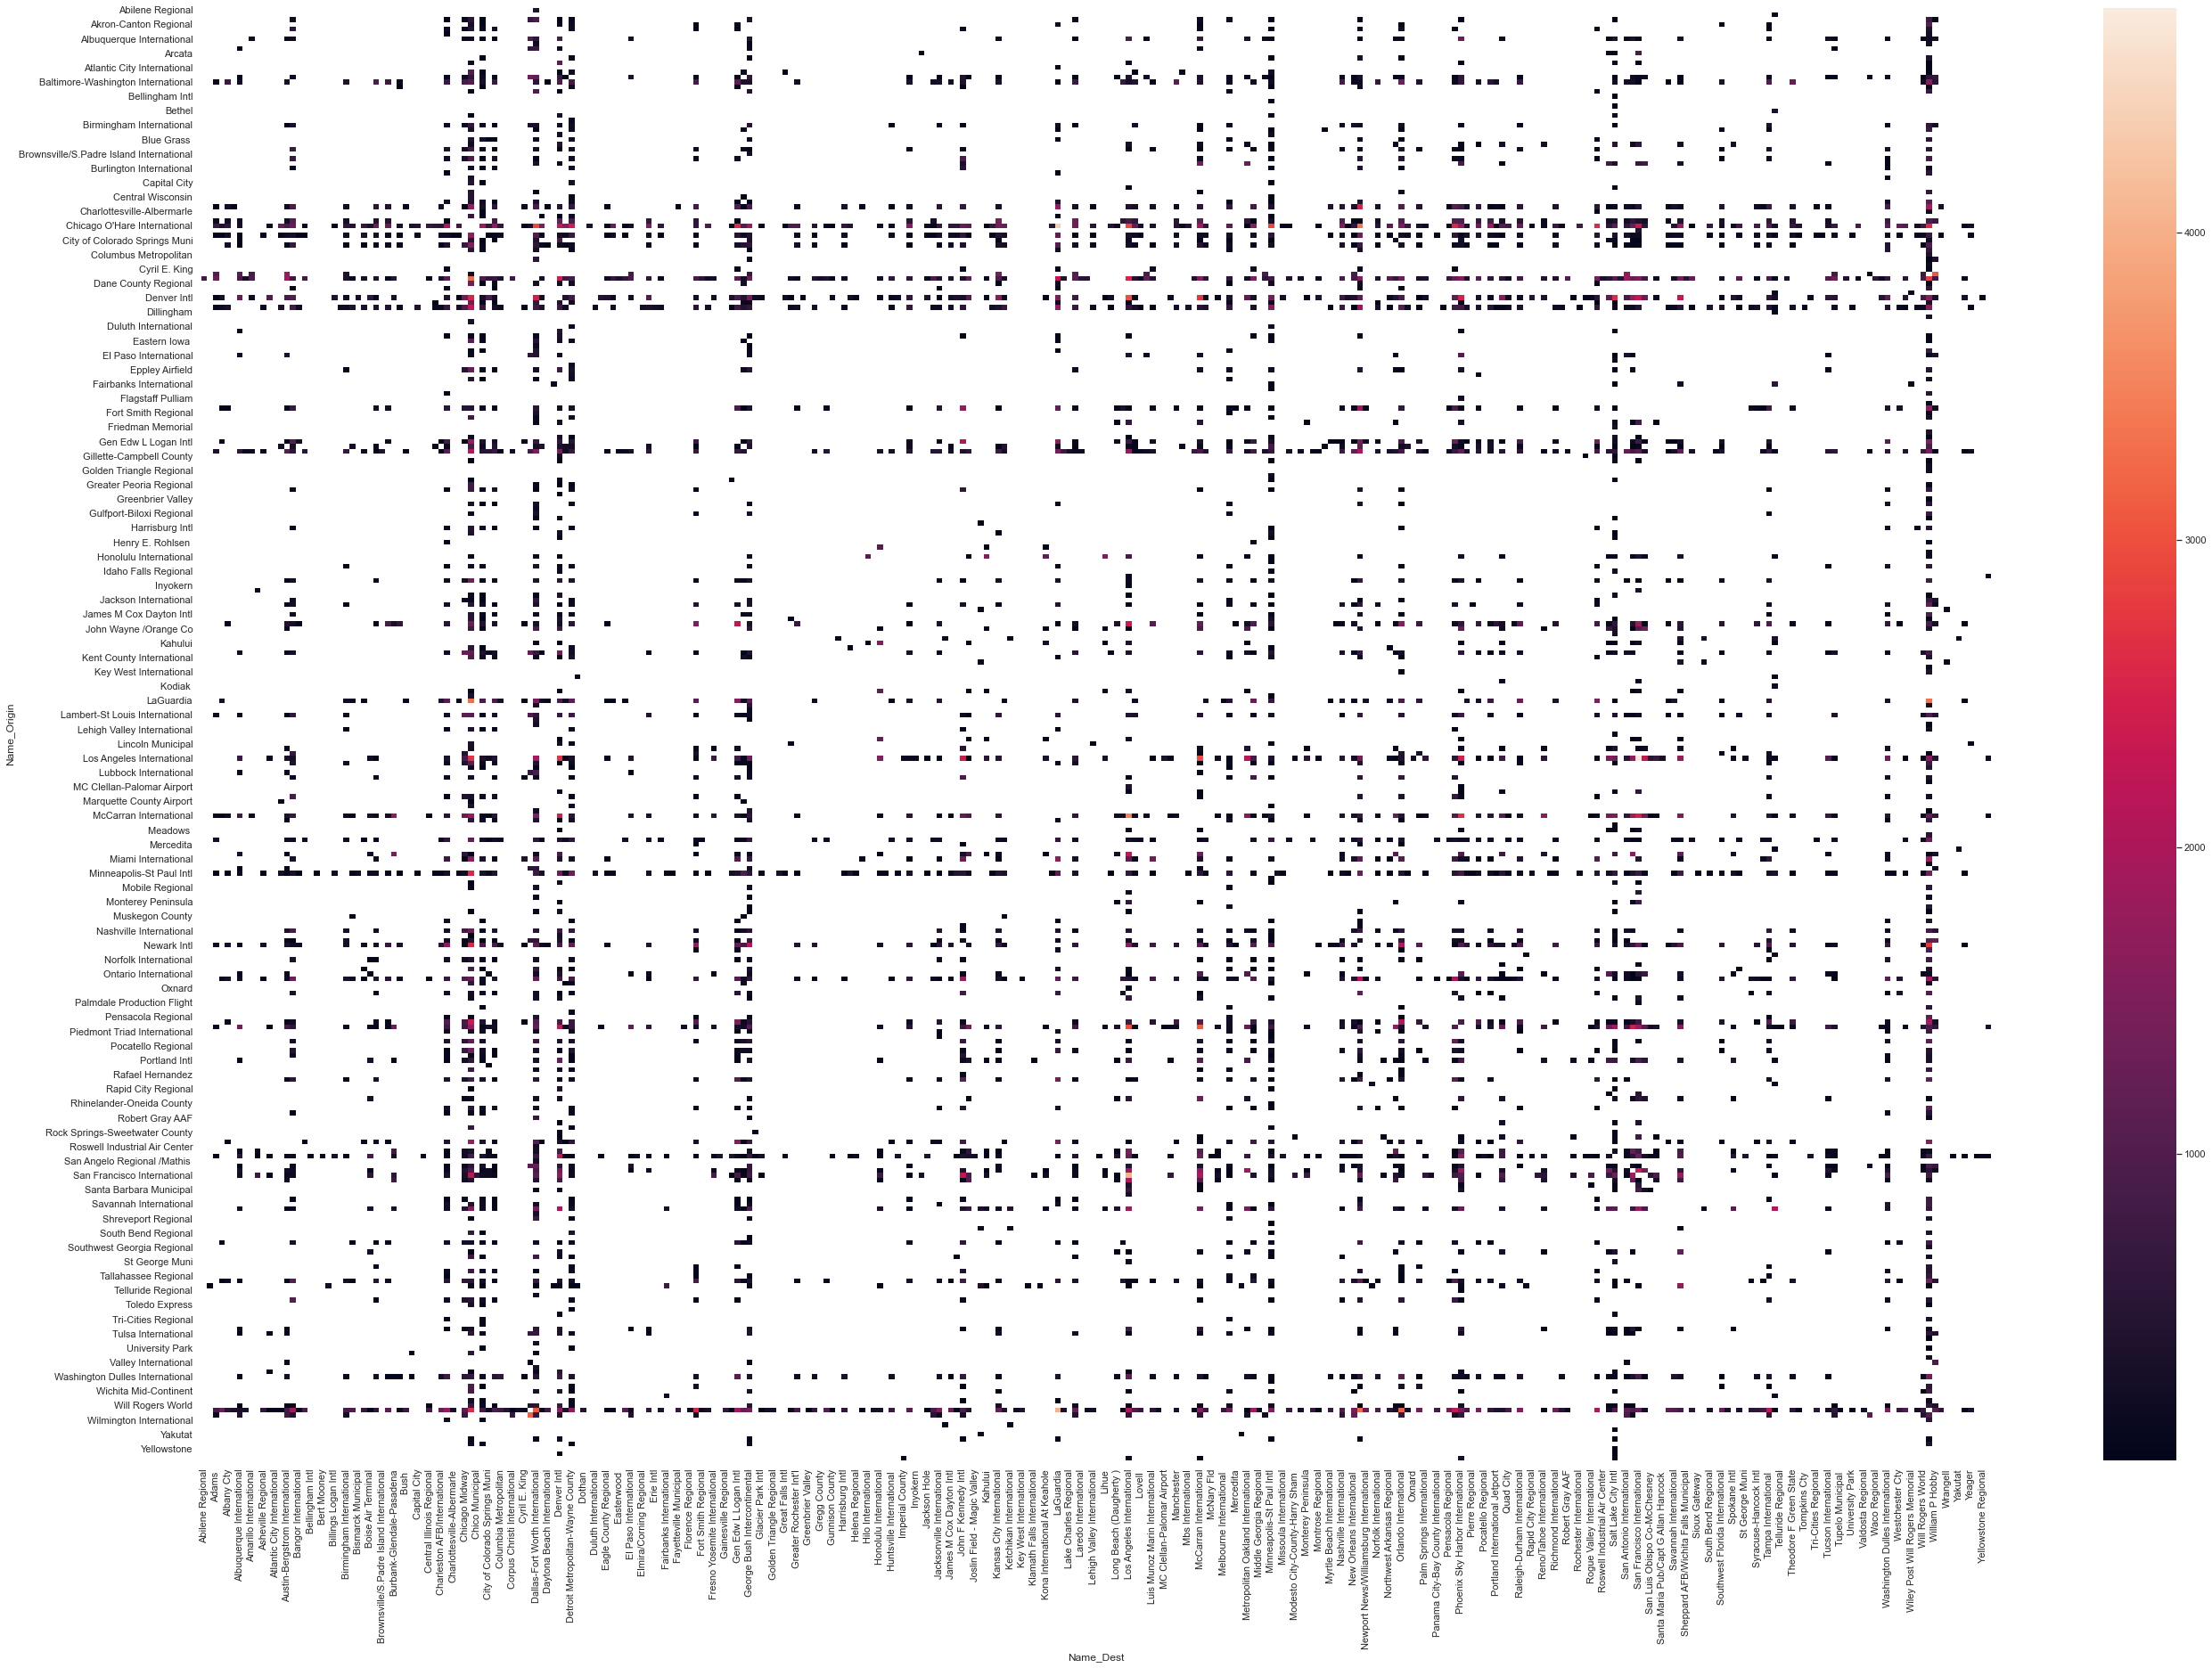

In [36]:
plt.figure(figsize=(45,30))

sns.heatmap(vols_aeroport.pivot_table(index='Name_Origin',columns='Name_Dest',values='Vols'))

In [37]:
# vols_aeroport.pivot_table(index='Origin',columns='Dest',values='Vols', )

### Geo

In [38]:
agrupats = delayed_flights.groupby(['Origin','Dest']).FlightNum.count().reset_index()

agrupats['orig_lat'] = agrupats.Origin.map(airports.lat)
agrupats['orig_long'] = agrupats.Origin.map(airports.long)
agrupats['dest_lat'] = agrupats.Dest.map(airports.lat)
agrupats['dest_long'] = agrupats.Dest.map(airports.long)



In [39]:
agrupats

,Origin,Dest,FlightNum,orig_lat,orig_long,dest_lat,dest_long
0,ABE,ATL,249,40.652363,-75.440402,33.640444,-84.426944
1,ABE,BHM,1,40.652363,-75.440402,33.562943,-86.753550
2,ABE,CLE,68,40.652363,-75.440402,41.410894,-81.849397
3,ABE,CLT,32,40.652363,-75.440402,35.214011,-80.943126
4,ABE,CVG,12,40.652363,-75.440402,39.046143,-84.662172
...,...,...,...,...,...,...,...
5122,YUM,IPL,59,32.656583,-114.605972,32.834220,-115.578746
5123,YUM,LAS,25,32.656583,-114.605972,36.080361,-115.152333
5124,YUM,LAX,161,32.656583,-114.605972,33.942536,-118.408074
5125,YUM,PHX,333,32.656583,-114.605972,33.434167,-112.008056


In [40]:
# import plotly.graph_objects as go
# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# fig.show()

In [41]:
# import plotly.graph_objects as go
# import pandas as pd


# fig = go.Figure()

# fig.add_trace(go.Scattergeo(
#     locationmode = 'USA-states',
#     lon = aeroports['long'],
#     lat = aeroports['lat'],
# #     hoverinfo = ['lon','lat'],
# #     hovertext = 'agrupats.Origin',
# #     text = df_airports['airport'],
#     mode = 'markers',
#     marker = dict(
#         size = 5,
#         color = 'rgb(122, 0, 122)',
#         line = dict(
#             width = 3,
#             color = 'rgba(68, 68, 68, 0)'
#         )
#     )))

# flight_paths = []
# for i in range(len(agrupats)):
#     fig.add_trace(
#         go.Scattergeo(
#             locationmode = 'USA-states',
#             lon = [agrupats['orig_long'][i], agrupats['dest_long'][i]],
#             lat = [agrupats['orig_lat'][i], agrupats['dest_lat'][i]],
# #             hoverinfo = ['location','name'],
# #             hovertext = f'{agrupats.Origin[i]}-{agrupats.Dest[i]}: {agrupats.FlightNum[i]} vols',
#             mode = 'lines',
#             line = dict(width = 2,color = 'darkblue'),
#             opacity = float(agrupats['FlightNum'][i]) / float(agrupats['FlightNum'].max()),

#         )
#     )

# fig.update_layout(
#     title_text = '2008. Vols.',
#     autosize=True,
#     width=1000,
#     height=1000,
#     showlegend = False,
#     geo = dict(
#         scope = 'north america',
#         projection_type = 'azimuthal equal area',
#         showland = True,
# #         landcolor = 'rgb(243, 243, 243)',
#         landcolor = 'rgb(255, 255, 200)',
#         countrycolor = 'rgb(204, 0, 204)',
#     ),
# )

# fig.show()

In [42]:
# plt.figure(figsize=(15,10))
# g= sns.scatterplot(data=agrupats, x='orig_long', y='orig_lat', alpha=0.1, size=agrupats.FlightNum, sizes=(5,1000))
# # g= sns.scatterplot(data=agrupats, x='dest_long', y='dest_lat', alpha=0.5, size=agrupats.FlightNum, sizes=(5,500))

# g.get_legend().remove()

#### Basemap

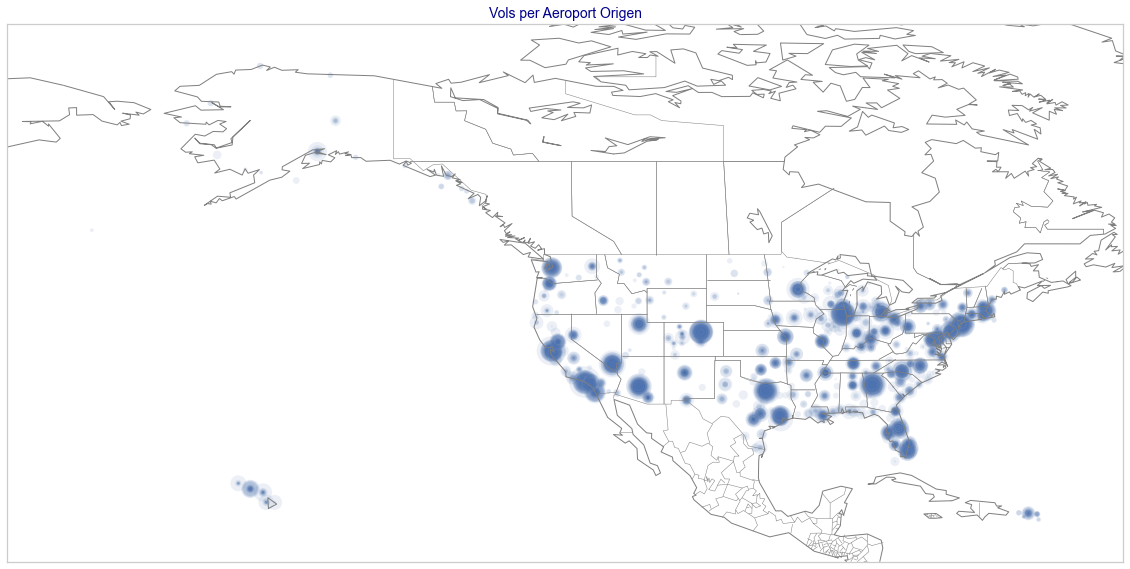

In [48]:
plt.figure(figsize=(20,15))

m = Basemap(llcrnrlon=agrupats.orig_long.min()-10, llcrnrlat=agrupats.orig_lat.min()-5,
            urcrnrlon=agrupats.orig_long.max()+10, urcrnrlat=agrupats.orig_lat.max()+5,)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

g= sns.scatterplot(data=agrupats, x='orig_long', y='orig_lat', alpha=0.1, size=agrupats.FlightNum, sizes=(5,1000))
# g= sns.scatterplot(data=agrupats, x='dest_long', y='dest_lat', alpha=0.5, size=agrupats.FlightNum, sizes=(5,500))

g.set_title("Vols per Aeroport Origen", fontdict={'fontsize':14, 'color':'darkblue'})
g.get_legend().remove()

plt.savefig('../images/t6-map_orig_num_flights.png')

In [44]:
agrupats.head()

,Origin,Dest,FlightNum,orig_lat,orig_long,dest_lat,dest_long
0,ABE,ATL,249,40.652363,-75.440402,33.640444,-84.426944
1,ABE,BHM,1,40.652363,-75.440402,33.562943,-86.753550
2,ABE,CLE,68,40.652363,-75.440402,41.410894,-81.849397
3,ABE,CLT,32,40.652363,-75.440402,35.214011,-80.943126
4,ABE,CVG,12,40.652363,-75.440402,39.046143,-84.662172


Text(0.5, 1.0, 'Vols per aeroport Sortida')

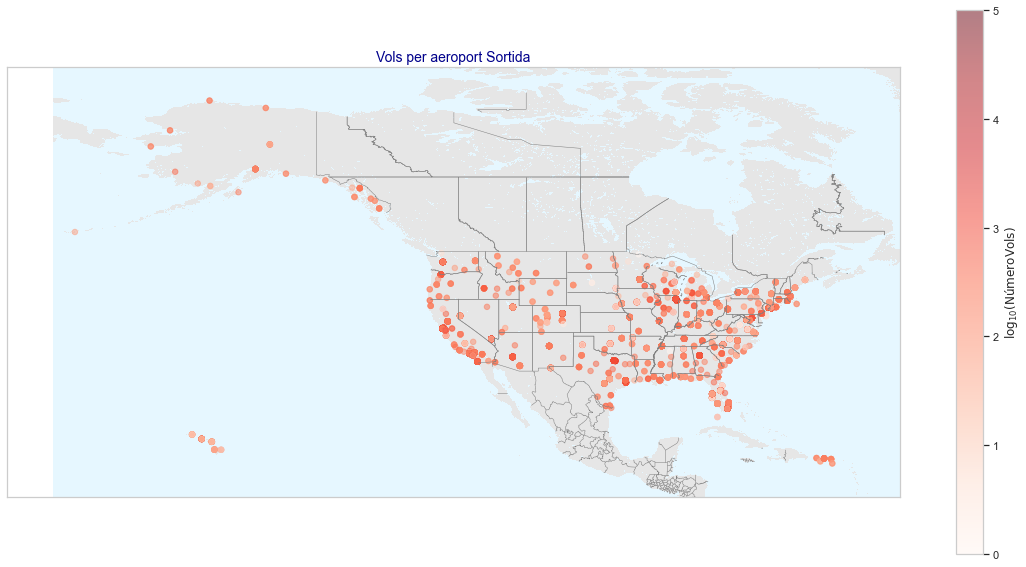

In [49]:
# adaptem l'exemple de https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

# 1. Draw the map background

fig = plt.figure(figsize=(20, 10))
m = Basemap(llcrnrlon=agrupats.orig_long.min()-10, llcrnrlat=agrupats.orig_lat.min()-5,
            urcrnrlon=agrupats.orig_long.max()+10, urcrnrlat=agrupats.orig_lat.max()+5,
#             lon_0=(agrupats.orig_long.max()+agrupats.orig_long.min())/2, 
#             lat_0=(agrupats.orig_lat.max()+agrupats.orig_lat.min())/2,)
            projection='cyl', resolution='h', )
#             width=1E6, height=1.2E6)
# m.shadedrelief()
# m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.drawlsmask(land_color = "#e6e6e6", 
               ocean_color="#e6f7ff",
               resolution = 'h')


m.scatter(agrupats.orig_long, agrupats.orig_lat, latlon=True,
          c=np.log10(agrupats.FlightNum), s=30,
          cmap='Reds', alpha=0.5)

plt.colorbar(label=r'$\log_{10}({\rm Número Vols})$')
plt.clim(0, 5)
plt.title('Vols per aeroport Sortida', fontdict={'fontsize':14, 'color':'darkblue'})

In [46]:
agrupats.head()

,Origin,Dest,FlightNum,orig_lat,orig_long,dest_lat,dest_long
0,ABE,ATL,249,40.652363,-75.440402,33.640444,-84.426944
1,ABE,BHM,1,40.652363,-75.440402,33.562943,-86.753550
2,ABE,CLE,68,40.652363,-75.440402,41.410894,-81.849397
3,ABE,CLT,32,40.652363,-75.440402,35.214011,-80.943126
4,ABE,CVG,12,40.652363,-75.440402,39.046143,-84.662172


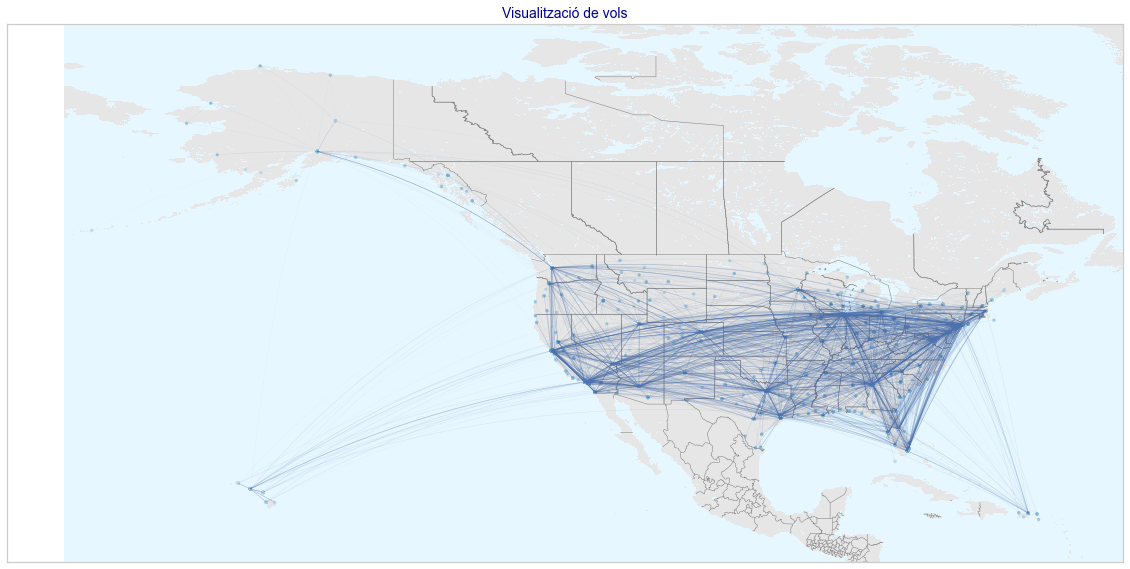

In [50]:
# adaptem l'exemple de https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

# 1. Draw the map background

fig = plt.figure(figsize=(20, 10))
m = Basemap(llcrnrlon=agrupats.orig_long.min()-10, llcrnrlat=agrupats.orig_lat.min()-5,
            urcrnrlon=agrupats.orig_long.max()+10, urcrnrlat=agrupats.orig_lat.max()+5,
#             lon_0=(agrupats.orig_long.max()+agrupats.orig_long.min())/2, 
#             lat_0=(agrupats.orig_lat.max()+agrupats.orig_lat.min())/2,)
            projection='cyl', resolution='h', )
#             width=1E6, height=1.2E6)
# m.shadedrelief()
# m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.drawlsmask(land_color = "#e6e6e6", 
               ocean_color="#e6f7ff",
               resolution = 'h')

maxflights = agrupats.FlightNum.max()
for index, row in agrupats.iterrows():
    m.drawgreatcircle(row.orig_long,row.orig_lat,row.dest_long,row.dest_lat,linewidth=0.5, color='b', alpha=row.FlightNum/maxflights)

ax = m.scatter(agrupats.orig_long, agrupats.orig_lat, latlon=True, s=5,
          c=np.log10(agrupats.FlightNum), cmap='Blues', alpha=0.5, )

# plt.colorbar(label=r'$\log_{10}({\rm Número Vols})$')
plt.clim(0, 5)
plt.title('Visualització de vols', fontdict={'fontsize':14, 'color':'darkblue'})


plt.savefig('../images/t6-map_flight_map.png')

#### GCMapper

In [ ]:
# https://github.com/paulgb/gcmap
# https://nbviewer.jupyter.org/gist/paulgb/5851489
from gcmap import GCMapper

gcm = GCMapper(width=4096, gc_resolution=100)


gcm.set_data(agrupats.orig_long, agrupats.orig_lat, agrupats.dest_long, agrupats.dest_lat)
img = gcm.draw()
img.crop((0,0,1400,1000)).save('../images/t6_gcmap.png')


In [ ]:
from IPython.core import display
display.Image(filename='../images/t6_gcmap.png')

### Retrassos per aeroport i dia/hora (Chicago O'Hare -ORD-)

In [51]:
def perc_ret(group):
    return group.sum() / group.count()

delayed_flights.groupby('Dest').agg({'endarrerit':['sum','count',perc_ret]}).sort_values(('endarrerit','perc_ret'))

endarrerit                 
            sum  count  perc_ret
Dest                            
BJI           8     12  0.666667
PSE         208    261  0.796935
WYS          25     31  0.806452
MDW       20776  25002  0.830974
BTM          71     85  0.835294
...         ...    ...       ...
DLG          42     42  1.000000
BPT          65     65  1.000000
PIR           3      3  1.000000
TEX          30     30  1.000000
INL           9      9  1.000000

[302 rows x 3 columns]

In [77]:
data = delayed_flights[delayed_flights.Origin=='ORD']


In [59]:
(data.ArrDelay > 0).sum(), data.endarrerit.sum()

(114630, 114630)

<AxesSubplot:title={'center':'% de vols retrassats a'}, xlabel='dia', ylabel='hora'>

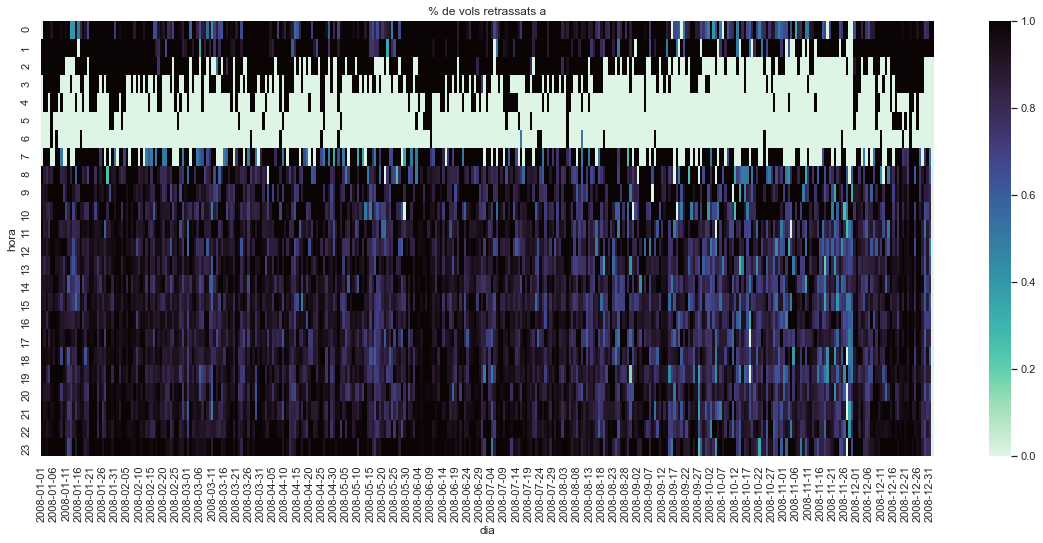

In [87]:
aggregat = data.groupby([pd.Grouper(key='ArrivalTime',freq='H')]).agg({'ArrTime':'count', 'endarrerit':'sum'})
aggregat['perc'] = aggregat.endarrerit / aggregat.ArrTime

aggregat.reset_index(inplace=True)
aggregat['dia'] = aggregat.ArrivalTime.dt.date
aggregat['hora'] = aggregat.ArrivalTime.dt.hour

plt.figure(figsize=(20,8))
plt.title('% de vols retrassats a')
sns.heatmap(aggregat.pivot(index='hora',columns='dia',values='perc').fillna(0), cmap='mako_r')

<AxesSubplot:xlabel='setmana', ylabel='dia_set'>

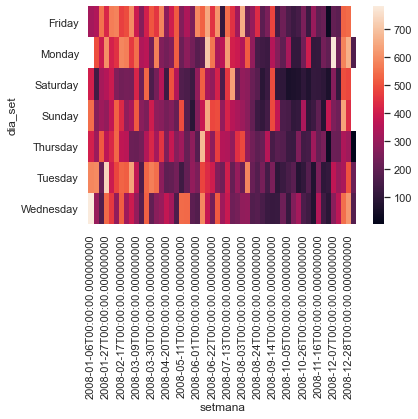

In [85]:
test.reset_index(inplace=True)
test['dia_set'] = test.dia.dt.day_name()
sns.heatmap(test.pivot(index='dia_set',columns='setmana',values='endarrerit'))

## Exercici 2  
Exporta els gràfics com imatges o com html.

**Ja els hem anat guardant durant l'exercici 1**

## Exercici 3
Exporta el data set net i amb les noves columnes a Excel.
El dataset net l'hem generat a l'exercici anterior